In [ ]:
#import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


In [ ]:
#to read file
df=pd.read_csv("/content/drive/MyDrive/DataSet/concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#to check columns and rows
df.shape

(1030, 9)

<Axes: >

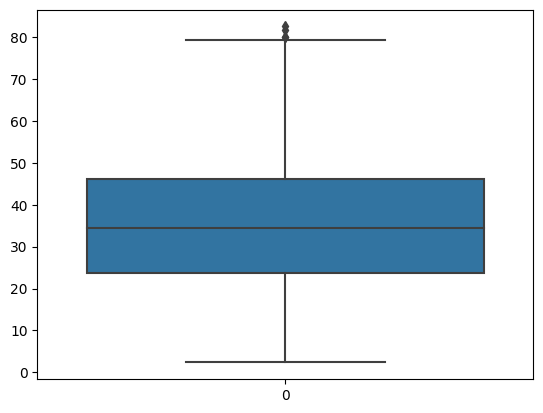

In [ ]:
#to check outliers
sns.boxplot(df['concrete_compressive_strength'])

In [ ]:
#to check outliers > 80
df[df["concrete_compressive_strength"]>80]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength


In [ ]:
#to drop outliers rows
df.drop(153,inplace=True)
df.drop(181,inplace=True)
df.drop(381,inplace=True)

In [ ]:
#check null values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [ ]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#Separate input and output variables
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [ ]:
# Apply standard scaler on numeric data
ss = StandardScaler()
x= ss.fit_transform(x)


In [ ]:
# Split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()

model.add(Dense(64, input_dim=8, activation="relu"))
model.add(Dropout(rate=0.05))
model.add(Dense(32, activation="relu"))
model.add(Dropout(rate=0.05))
model.add(Dense(16, activation="relu"))
model.add(Dropout(rate=0.05))
model.add(Dense(8, activation="relu"))
model.add(Dropout(rate=0.05))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse") #complile model
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=50) #use early stopping

model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),callbacks=[earlystop], batch_size=16) #train data


Epoch 1/500
44/44 [==============================] - 1s 4ms/step - loss: 1445.2310 - val_loss: 1356.4287
Epoch 2/500
44/44 [==============================] - 0s 2ms/step - loss: 1090.0262 - val_loss: 606.5812
Epoch 3/500
44/44 [==============================] - 0s 2ms/step - loss: 387.0898 - val_loss: 213.8426
Epoch 4/500
44/44 [==============================] - 0s 2ms/step - loss: 285.8003 - val_loss: 188.6442
Epoch 5/500
44/44 [==============================] - 0s 2ms/step - loss: 255.6729 - val_loss: 182.0177
Epoch 6/500
44/44 [==============================] - 0s 2ms/step - loss: 232.8076 - val_loss: 175.4618
Epoch 7/500
44/44 [==============================] - 0s 2ms/step - loss: 208.5952 - val_loss: 156.6934
Epoch 8/500
44/44 [==============================] - 0s 2ms/step - loss: 214.7825 - val_loss: 148.8270
Epoch 9/500
44/44 [==============================] - 0s 2ms/step - loss: 177.8306 - val_loss: 144.0832
Epoch 10/500
44/44 [==============================] - 0s 2ms/step - lo

In [ ]:
#BATCH_SIZE=16
ypred=model.predict(x_test)
print("MSE",mean_squared_error(y_test,ypred))
print("MAE",mean_absolute_error(y_test,ypred))


10/10 [==============================] - 0s 1ms/step
MSE 21.369576764857825
MAE 3.391143760934621
